In [17]:
%pylab notebook
import matplotlib.pylab as plt
import pandas as pd
import re

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [59]:
pd.set_option('display.max_columns', 360)
pd.set_option('display.max_rows', 360)

In [18]:
modice_file = '/Users/brodzik/projects/MODICE/data/MASCONS/mascon_areas_by_year.csv'
modice = pd.read_csv(modice_file)
modice.set_index('Year', inplace=True, verify_integrity=True, drop=True)

In [19]:
seaice_file = '/Users/brodzik/projects/MODICE/data/sii/nsidc0051_year_by_month.csv'
seaice = pd.read_csv(seaice_file)
seaice.set_index('Year', inplace=True, verify_integrity=True, drop=True)

In [56]:
seaice

,01_total_extent_km2,02_total_extent_km2,03_total_extent_km2,04_total_extent_km2,05_total_extent_km2,06_total_extent_km2,07_total_extent_km2,08_total_extent_km2,09_total_extent_km2,10_total_extent_km2,11_total_extent_km2,12_total_extent_km2,01_total_area_km2,02_total_area_km2,03_total_area_km2,04_total_area_km2,05_total_area_km2,06_total_area_km2,07_total_area_km2,08_total_area_km2,09_total_area_km2,10_total_area_km2,11_total_area_km2,12_total_area_km2,01_laptev_extent_km2,02_laptev_extent_km2,03_laptev_extent_km2,04_laptev_extent_km2,05_laptev_extent_km2,06_laptev_extent_km2,07_laptev_extent_km2,08_laptev_extent_km2,09_laptev_extent_km2,10_laptev_extent_km2,11_laptev_extent_km2,12_laptev_extent_km2,01_laptev_area_km2,02_laptev_area_km2,03_laptev_area_km2,04_laptev_area_km2,05_laptev_area_km2,06_laptev_area_km2,07_laptev_area_km2,08_laptev_area_km2,09_laptev_area_km2,10_laptev_area_km2,11_laptev_area_km2,12_laptev_area_km2,01_kara_extent_km2,02_kara_extent_km2,03_kara_extent_km2,04_kara_extent_km2,05_kara_extent_km2,06_kara_extent_km2,07_kara_extent_km2,08_kara_extent_km2,09_kara_extent_km2,10_kara_extent_km2,11_kara_extent_km2,12_kara_extent_km2,01_kara_area_km2,02_kara_area_km2,03_kara_area_km2,04_kara_area_km2,05_kara_area_km2,06_kara_area_km2,07_kara_area_km2,08_kara_area_km2,09_kara_area_km2,10_kara_area_km2,11_kara_area_km2,12_kara_area_km2,01_eastsiberian_extent_km2,02_eastsiberian_extent_km2,03_eastsiberian_extent_km2,04_eastsiberian_extent_km2,05_eastsiberian_extent_km2,06_eastsiberian_extent_km2,07_eastsiberian_extent_km2,08_eastsiberian_extent_km2,09_eastsiberian_extent_km2,10_eastsiberian_extent_km2,11_eastsiberian_extent_km2,12_eastsiberian_extent_km2,01_eastsiberian_area_km2,02_eastsiberian_area_km2,03_eastsiberian_area_km2,04_eastsiberian_area_km2,05_eastsiberian_area_km2,06_eastsiberian_area_km2,07_eastsiberian_area_km2,08_eastsiberian_area_km2,09_eastsiberian_area_km2,10_eastsiberian_area_km2,11_eastsiberian_area_km2,12_eastsiberian_area_km2,01_stlawrence_extent_km2,02_stlawrence_extent_km2,03_stlawrence_extent_km2,04_stlawrence_extent_km2,05_stlawrence_extent_km2,06_stlawrence_extent_km2,07_stlawrence_extent_km2,08_stlawrence_extent_km2,09_stlawrence_extent_km2,10_stlawrence_extent_km2,11_stlawrence_extent_km2,12_stlawrence_extent_km2,01_stlawrence_area_km2,02_stlawrence_area_km2,03_stlawrence_area_km2,04_stlawrence_area_km2,05_stlawrence_area_km2,06_stlawrence_area_km2,07_stlawrence_area_km2,08_stlawrence_area_km2,09_stlawrence_area_km2,10_stlawrence_area_km2,11_stlawrence_area_km2,12_stlawrence_area_km2,01_hudson_extent_km2,02_hudson_extent_km2,03_hudson_extent_km2,04_hudson_extent_km2,05_hudson_extent_km2,06_hudson_extent_km2,07_hudson_extent_km2,08_hudson_extent_km2,09_hudson_extent_km2,10_hudson_extent_km2,11_hudson_extent_km2,12_hudson_extent_km2,01_hudson_area_km2,02_hudson_area_km2,03_hudson_area_km2,04_hudson_area_km2,05_hudson_area_km2,06_hudson_area_km2,07_hudson_area_km2,08_hudson_area_km2,09_hudson_area_km2,10_hudson_area_km2,11_hudson_area_km2,12_hudson_area_km2,01_baffin_extent_km2,02_baffin_extent_km2,03_baffin_extent_km2,04_baffin_extent_km2,05_baffin_extent_km2,06_baffin_extent_km2,07_baffin_extent_km2,08_baffin_extent_km2,09_baffin_extent_km2,10_baffin_extent_km2,11_baffin_extent_km2,12_baffin_extent_km2,01_baffin_area_km2,02_baffin_area_km2,03_baffin_area_km2,04_baffin_area_km2,05_baffin_area_km2,06_baffin_area_km2,07_baffin_area_km2,08_baffin_area_km2,09_baffin_area_km2,10_baffin_area_km2,11_baffin_area_km2,12_baffin_area_km2,01_bering_extent_km2,02_bering_extent_km2,03_bering_extent_km2,04_bering_extent_km2,05_bering_extent_km2,06_bering_extent_km2,07_bering_extent_km2,08_bering_extent_km2,09_bering_extent_km2,10_bering_extent_km2,11_bering_extent_km2,12_bering_extent_km2,01_bering_area_km2,02_bering_area_km2,03_bering_area_km2,04_bering_area_km2,05_bering_area_km2,06_bering_area_km2,07_bering_area_km2,08_bering_area_km2,09_bering_area_km2,10_bering_area_km2,11_bering_area_km2,12_bering_

In [24]:
seaice.drop([1999], inplace=True)
seaice

,01_total_extent_km2,02_total_extent_km2,03_total_extent_km2,04_total_extent_km2,05_total_extent_km2,06_total_extent_km2,07_total_extent_km2,08_total_extent_km2,09_total_extent_km2,10_total_extent_km2,...,03_chukchi_area_km2,04_chukchi_area_km2,05_chukchi_area_km2,06_chukchi_area_km2,07_chukchi_area_km2,08_chukchi_area_km2,09_chukchi_area_km2,10_chukchi_area_km2,11_chukchi_area_km2,12_chukchi_area_km2
Year,,,,,,,,,,,,,,,,,,,,,
2000,14535974.0,15302491.0,15382748.0,14751192.0,13258767.0,11797237.0,9809609.0,7272316.0,6361242.0,8945551.0,...,804044.0,814298.0,804500.0,651452.0,443434.0,277725.0,185198.0,420849.0,636230.0,761076.0
2001,14420073.0,15417612.0,15723336.0,14973707.0,13778176.0,11753749.0,9284882.0,7529956.0,6777849.0,8601947.0,...,806795.0,809719.0,781365.0,609103.0,395669.0,258573.0,223353.0,481419.0,729920.0,807315.0
2002,14568011.0,15465497.0,15536855.0,14455330.0,13175821.0,11774150.0,9579813.0,6568202.0,5981516.0,8825055.0,...,789618.0,780469.0,720359.0,547061.0,356859.0,142914.0,72603.0,249928.0,521686.0,737623.0
2003,14587970.0,15352767.0,15614924.0,14680578.0,13085408.0,11852723.0,9527327.0,6934298.0,6184660.0,8671509.0,...,815320.0,796071.0,700416.0,535116.0,282944.0,122996.0,83388.0,227794.0,421740.0,756396.0
2004,14145035.0,15044432.0,15151214.0,14204414.0,12642298.0,11581625.0,9651145.0,6867679.0,6081899.0,8504884.0,...,793640.0,800286.0,740042.0,571161.0,349174.0,108066.0,98349.0,188415.0,464041.0,759326.0
2005,13805291.0,14502784.0,14849592.0,14179071.0,13065544.0,11384970.0,8990790.0,6326816.0,5593692.0,8486385.0,...,805640.0,810894.0,737597.0,578877.0,373584.0,165666.0,151671.0,214383.0,480263.0,794694.0
2006,13724887.0,14541957.0,14542387.0,14066142.0,12679492.0,11132544.0,8735814.0,6561047.0,5949744.0,8359122.0,...,807973.0,823400.0,780011.0,652507.0,412383.0,241666.0,146901.0,247704.0,390901.0,667661.0
2007,13891515.0,14648254.0,14756338.0,13968973.0,12956236.0,11588930.0,8187444.0,5405329.0,4324233.0,6799766.0,...,794997.0,784805.0,756505.0,493062.0,228294.0,45826.0,1590.0,46913.0,301257.0,590324.0
2008,14140570.0,15092274.0,15327558.0,14485645.0,13227604.0,11410751.0,9008575.0,6068790.0,4736942.0,8439029.0,...,817741.0,799785.0,741588.0,614678.0,275557.0,54142.0,2304.0,152162.0,535123.0,754758.0


<IPython.core.display.Javascript object>


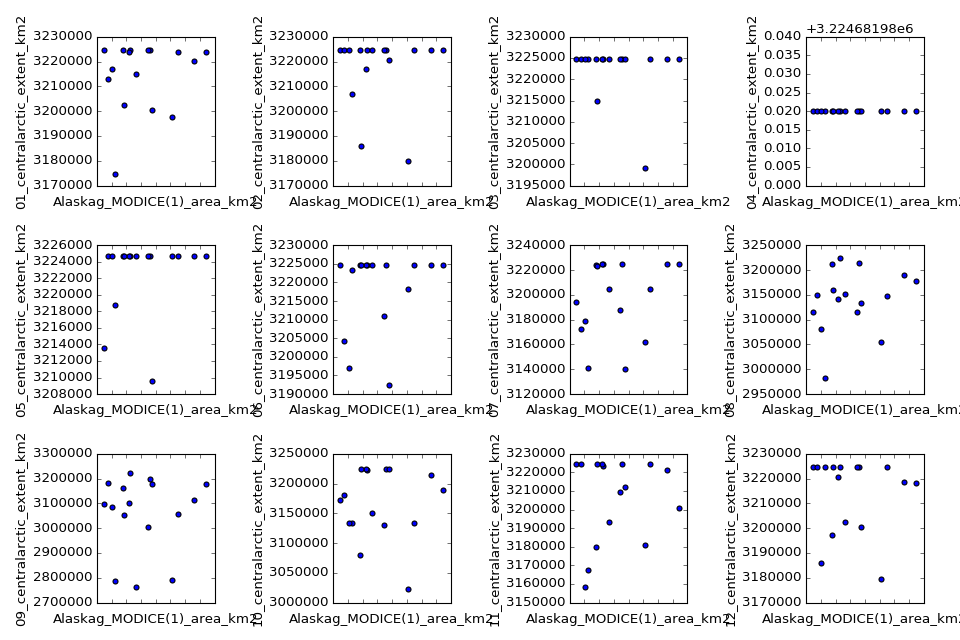

In [57]:
months = np.arange(12) + 1
nrows = 3
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 8))
modice_column = 'Alaskag_1strike_MODICE_area_km^2'
modice_label = 'Alaskag_MODICE(1)_area_km2'
seaice_column = 'centralarctic_extent_km2'
for i, month in enumerate(months):
    col = i % ncols
    row = i / ncols
    y_column = "%02d_%s" % (month, seaice_column)
    ax[row, col].scatter(
        x=modice[modice_column],
        y=seaice[y_column])
    ax[row, col].set_xlabel(modice_label)
    ax[row, col].set_xticklabels(ax[row, col].xaxis.get_majorticklabels(), rotation=45)
    ax[row, col].set_ylabel(y_column)
plt.tight_layout() 